# Car Price Prediction

## [Database source](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction)

This dataset was provided for learning purpose, where our goal is to predict car price from its significant features.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.mosaicplot import mosaic

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

from copy import deepcopy


In [3]:
df = pd.read_csv("CarPrice_Assignment.csv", index_col='car_ID')
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [4]:
# Checking attributes
print(f'List of attributes:\n{list(df.columns)}\n')
print(f'Number of attributes: {len(df.columns)}')
print(f'Number of records: {len(df)}')

List of attributes:
['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

Number of attributes: 25
Number of records: 205


![](features_dictionary.png "Features")

## Dataset contains 11 categorical attributes and 14 numerical attributes

In [5]:
print(f'Total null values:\n{df.isnull().sum()}')
print(f'\nDuplicated values:\n{df.duplicated().sum()}')

Total null values:
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Duplicated values:
0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [7]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f'Numerical: {numerical_cols}')
print(f'Categorical: {categorical_cols}')

Numerical: ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
Categorical: ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


## Lets Explore this dataset

In [8]:
# Basic statistics
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


100.00000000000003
             count  percentage
toyota          32   15.609756
nissan          18    8.780488
mazda           17    8.292683
mitsubishi      13    6.341463
honda           13    6.341463
volkswagen      12    5.853659
subaru          12    5.853659
peugeot         11    5.365854
volvo           11    5.365854
dodge            9    4.390244
buick            8    3.902439
bmw              8    3.902439
audi             7    3.414634
plymouth         7    3.414634
saab             6    2.926829
porsche          5    2.439024
isuzu            4    1.951220
jaguar           3    1.463415
chevrolet        3    1.463415
alfa-romero      3    1.463415
renault          2    0.975610
mercury          1    0.487805


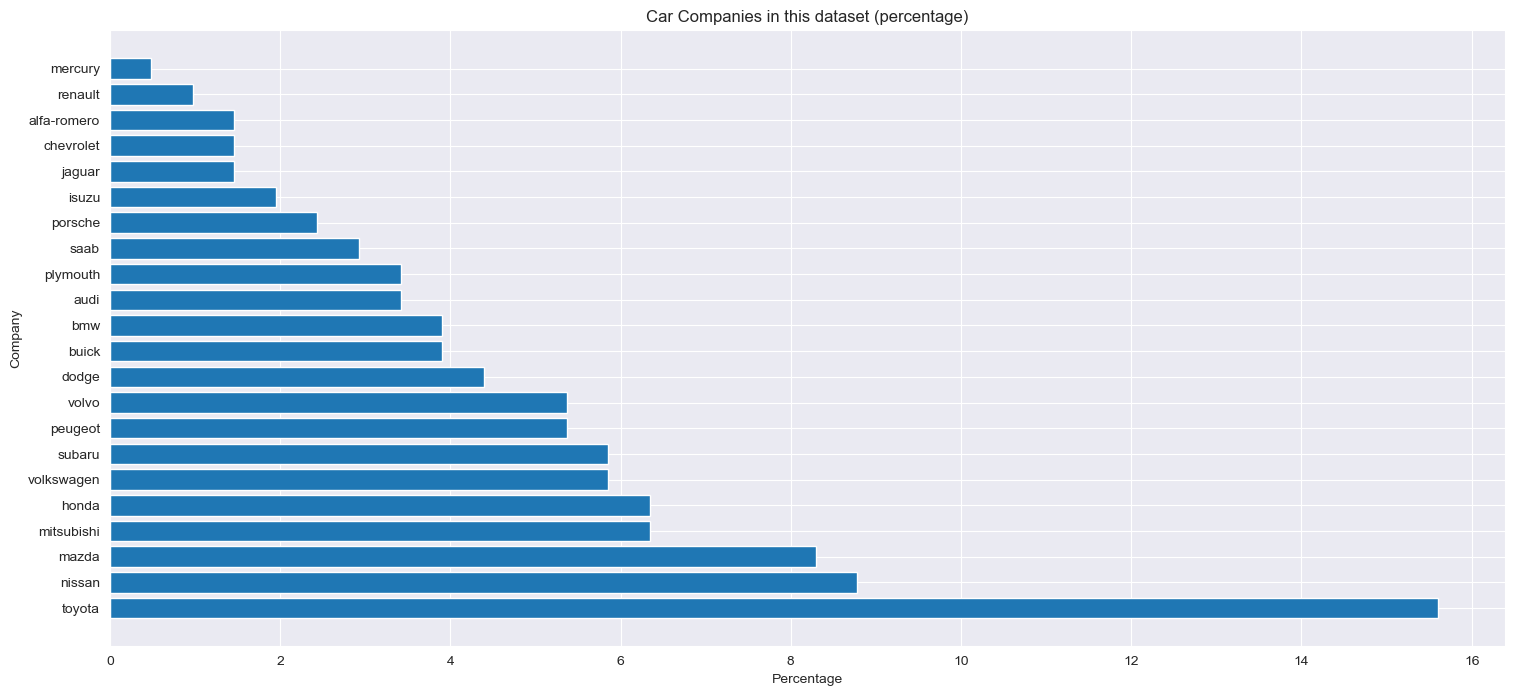

In [9]:
car_company = pd.DataFrame(df['CarName'])
car_company['CarCompany'] = car_company['CarName'].apply(lambda x: x.split()[0])
values = car_company['CarCompany'].value_counts()
percentage = (values / len(df)) * 100

print(sum(percentage))

values = pd.concat([values, percentage], axis=1)
values.columns = ['count', 'percentage']
print(values)

plt.figure(figsize=(18, 8))
plt.title('Car Companies in this dataset (percentage)')
plt.ylabel('Company')
plt.xlabel('Percentage')

plt.barh(values.index, values['percentage'])

plt.show()

# Original dataset has some typo mistake connected with companies, I have corrected them


In [10]:
counts = df['enginesize']
bins = [0, 93, 122, 152, 182, 213, 900]
# for example first bin is [0, 93), second is [93, 122) etc.
# In dataset, we probably have Cubic Inches
labels = ['0-1.5', '1.6-2.0', '2.1-2.5', '2.6-3.0', '3.1-3.5', '>3.5']
categories = pd.cut(counts, bins=bins, labels=labels)
values = pd.DataFrame(categories.value_counts())
values['percentage'] = values['enginesize'] / len(df) * 100
values

,enginesize,percentage
1.6-2.0,92,44.878049
0-1.5,38,18.536585
2.1-2.5,38,18.536585
2.6-3.0,19,9.268293
3.1-3.5,11,5.365854
>3.5,7,3.414634


![](cid.png)

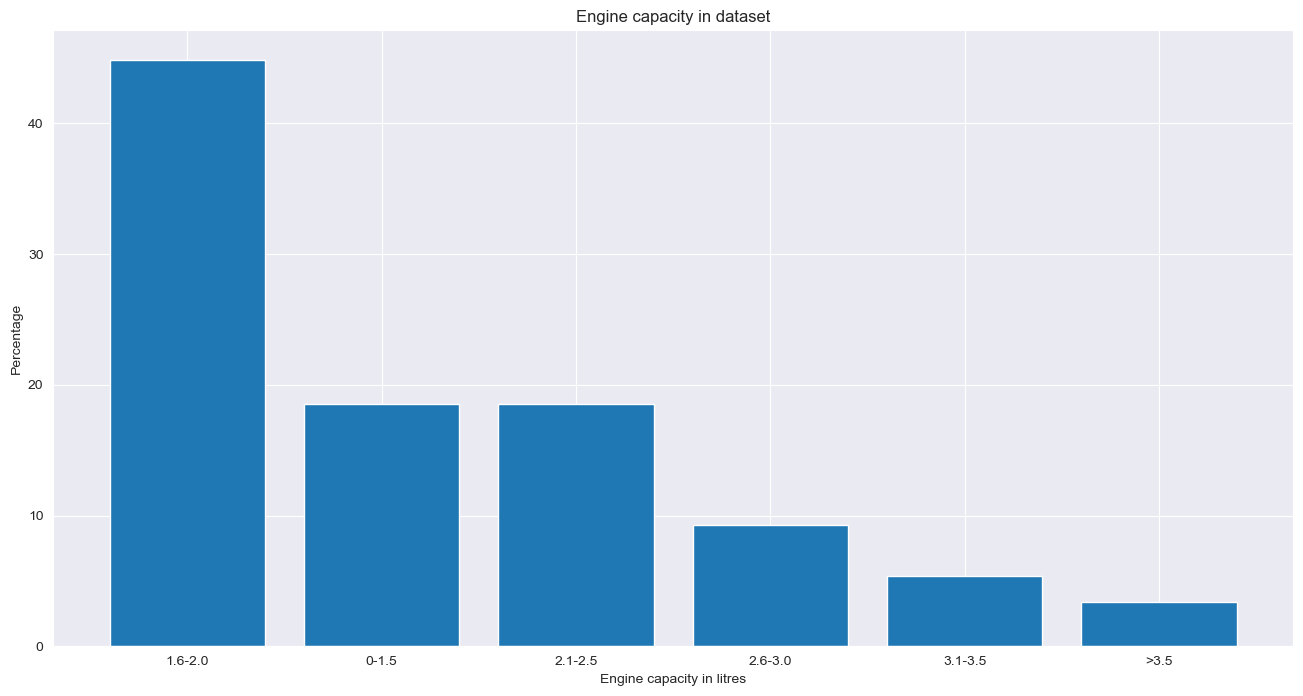

In [11]:
plt.figure(figsize=(16, 8))
plt.title('Engine capacity in dataset')
plt.xlabel('Engine capacity in litres')
plt.ylabel('Percentage')
plt.bar(values.index, values.percentage)
plt.show()

             carbody  percentage
sedan             96   46.829268
hatchback         70   34.146341
wagon             25   12.195122
hardtop            8    3.902439
convertible        6    2.926829


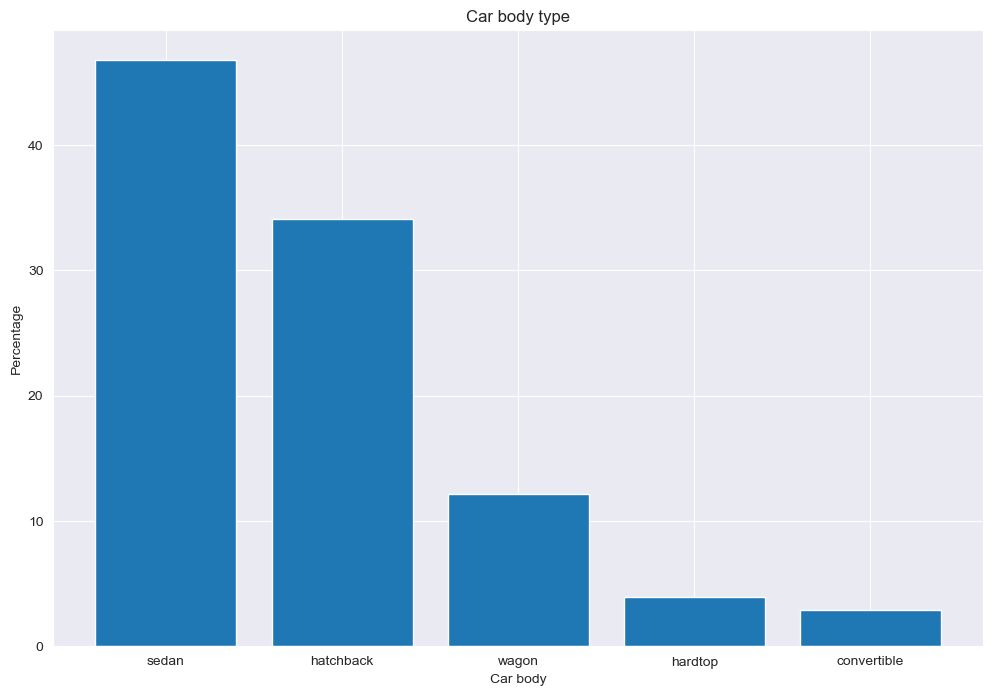

In [39]:
values = pd.DataFrame(df['carbody'].value_counts())
values['percentage'] = values['carbody'] / len(df) * 100
print(values)

plt.figure(figsize=(12,8))
plt.xlabel('Car body')
plt.ylabel('Percentage')
plt.title('Car body type')
plt.bar(values.index, values.percentage)
plt.show()

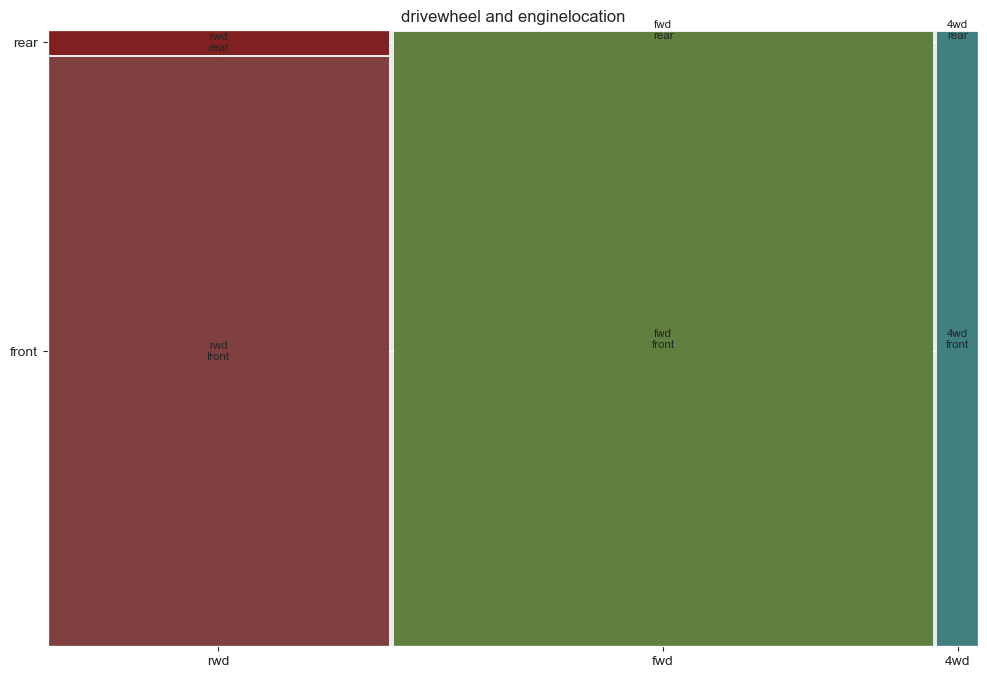

In [13]:
# Size of plot
plt.rcParams["figure.figsize"]=(12, 8)
fig = mosaic(df, index=['drivewheel','enginelocation'], title='drivewheel and enginelocation')
plt.show()

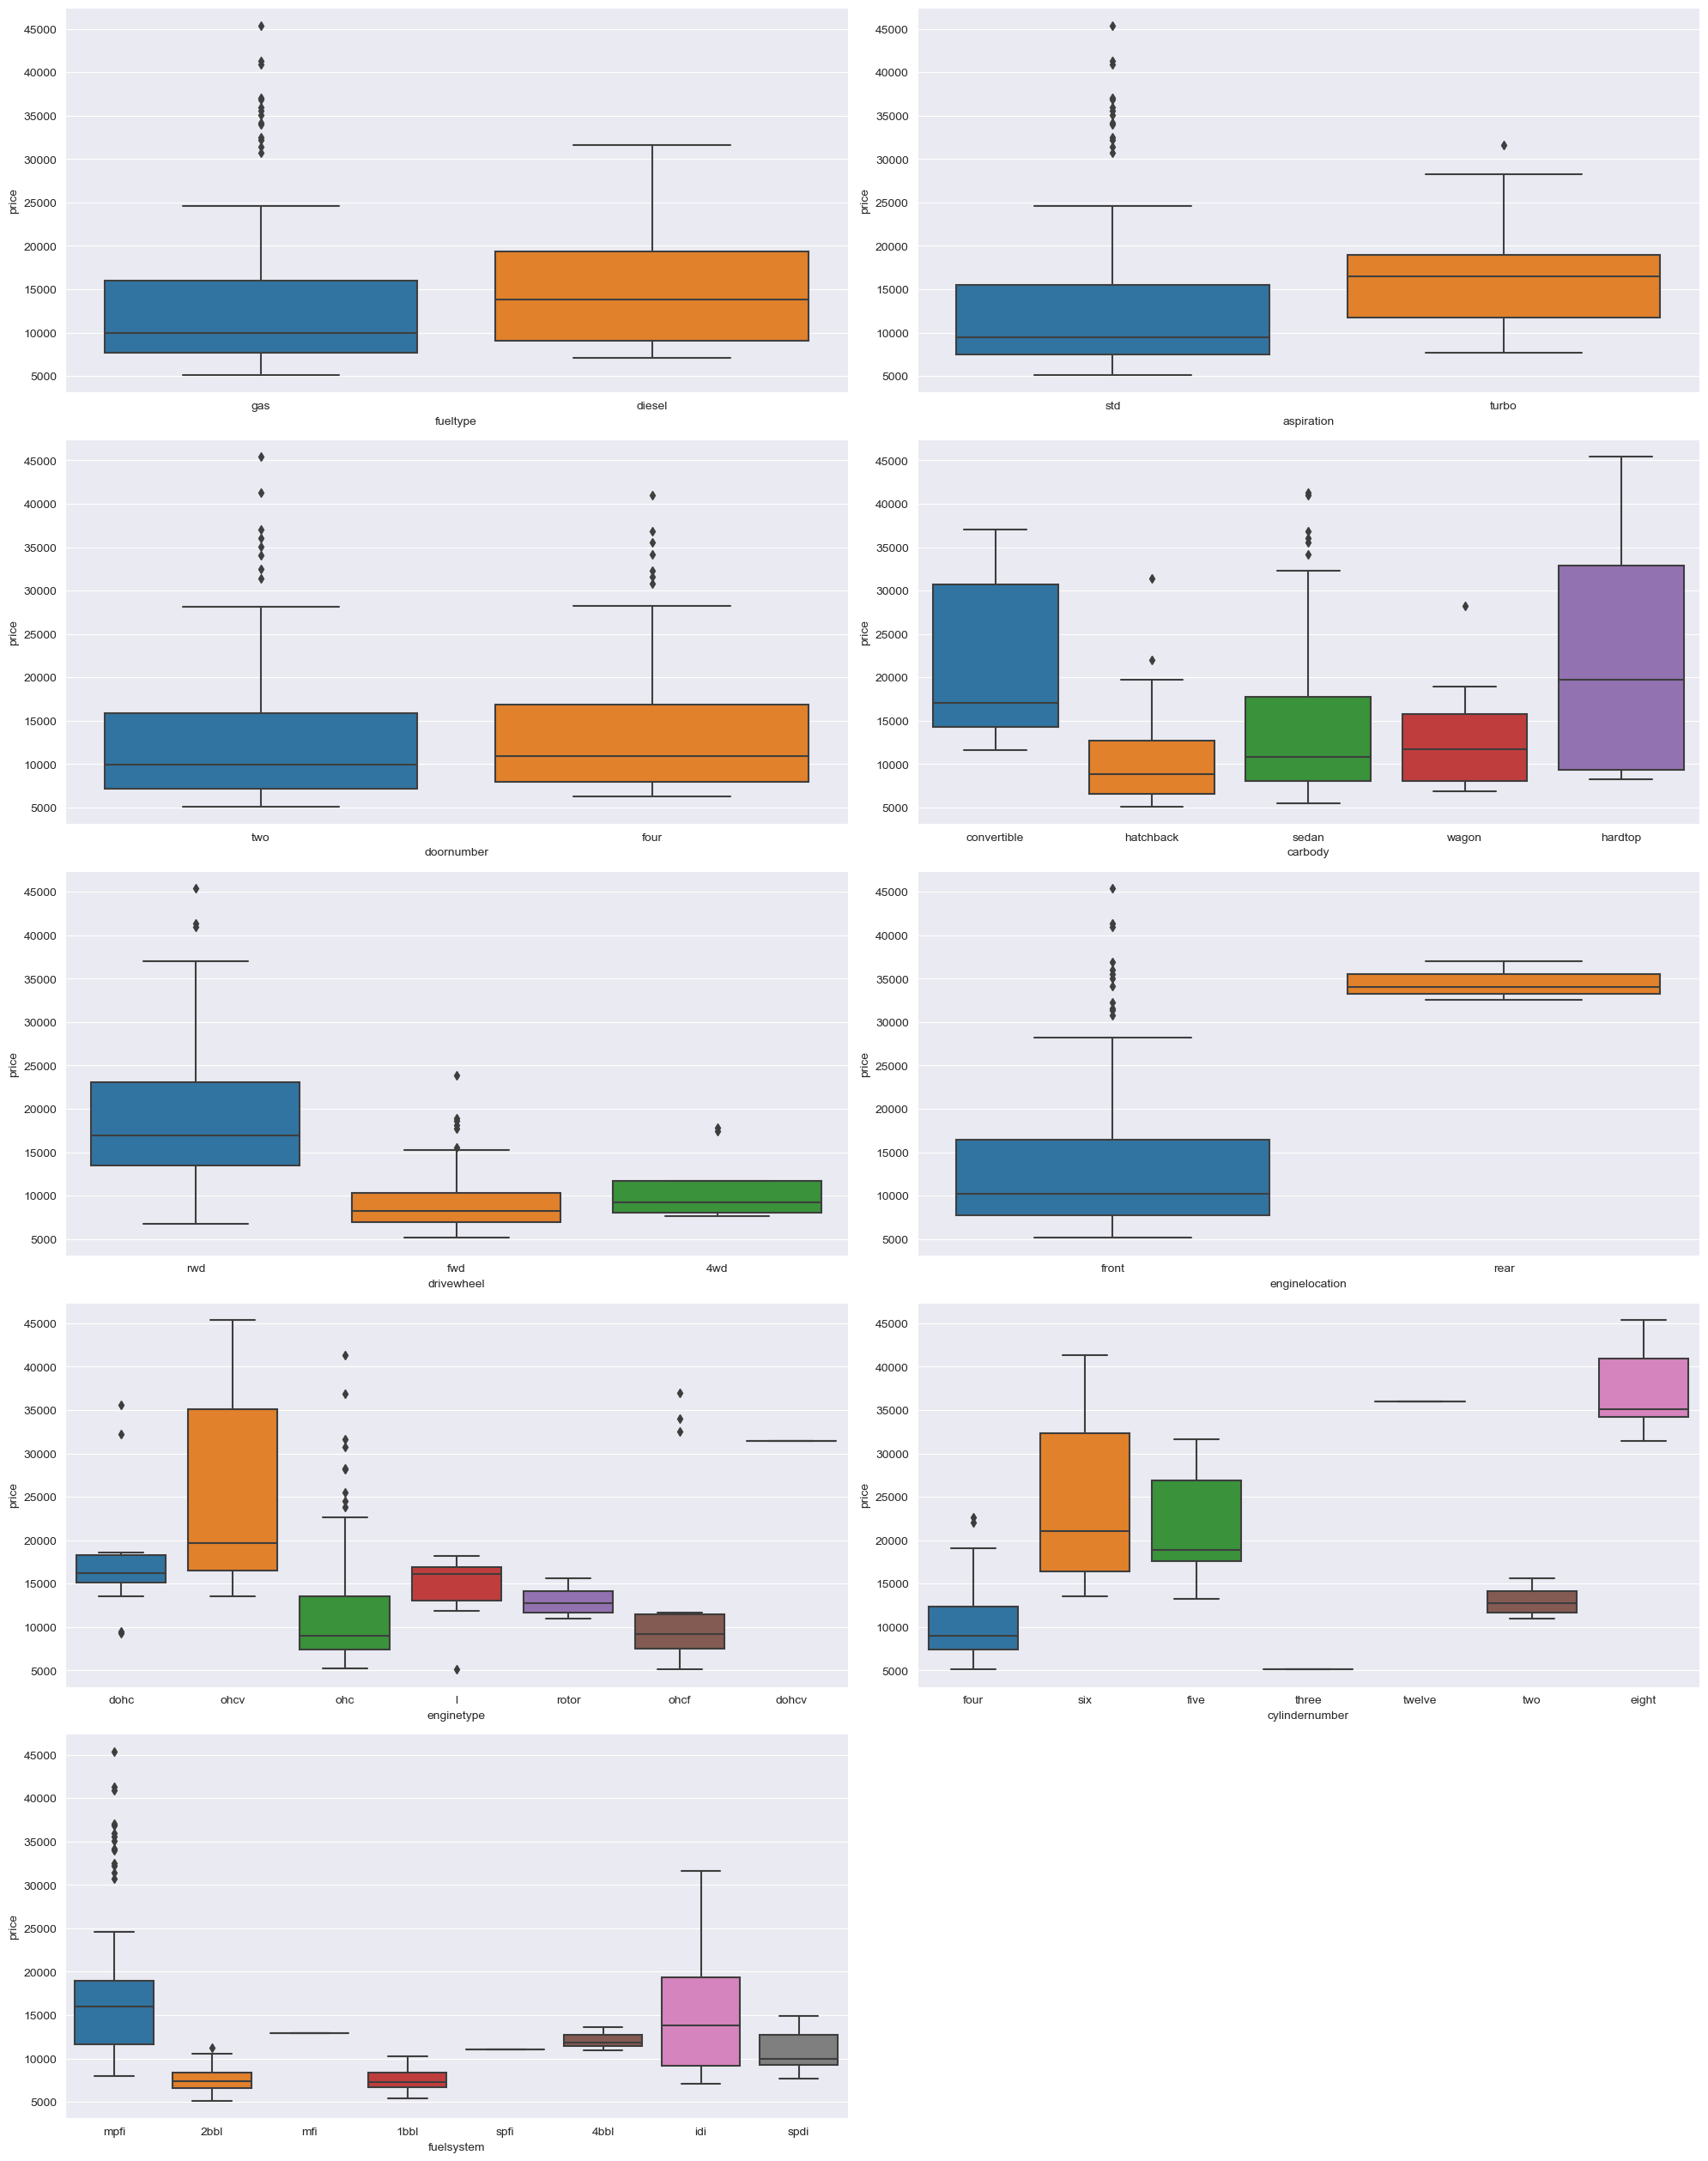

In [14]:
plt.figure(figsize=(20, 45))
categorical_cols.remove('CarName')

for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 2, i+1)
    sns.boxplot(data=df, x=col, y='price')

plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_14988\2261544373.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_df.corr().abs()


<Axes: >

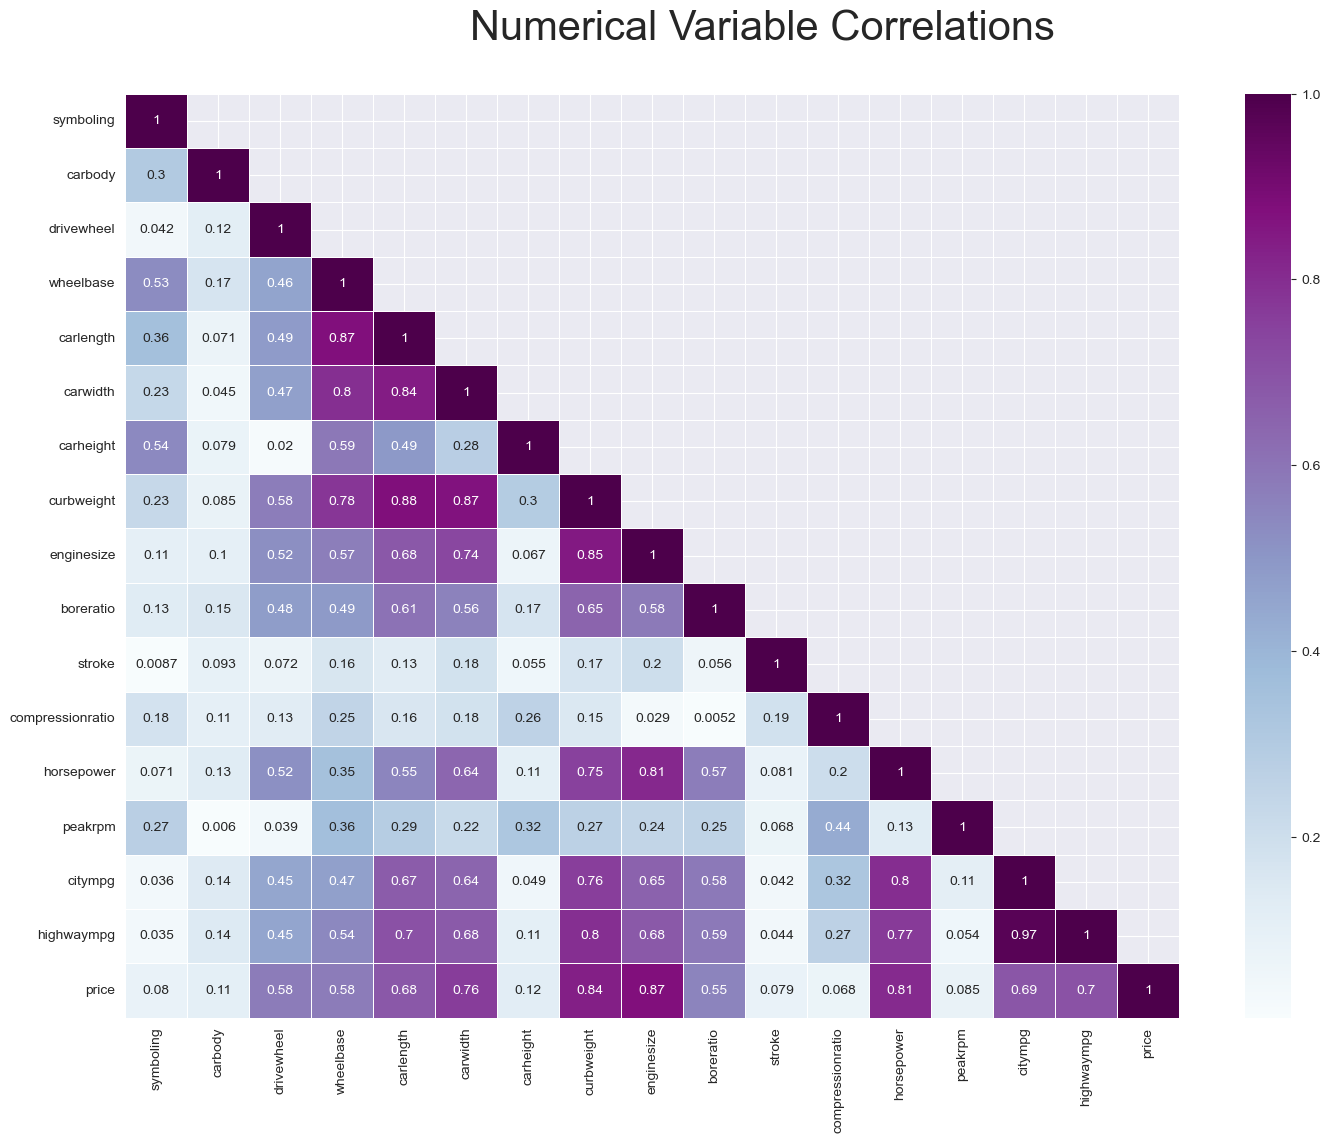

In [15]:
corr_df = df.copy()
corr_df['carbody'] = corr_df['carbody'].replace(['sedan', 'hatchback', 'wagon', 'hardtop', 'convertible'], [1, 2, 3, 4, 5])
corr_df['drivewheel'] = corr_df['drivewheel'].replace(['rwd', 'fwd', '4wd'], [1, 2, 3])
corr = corr_df.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Numerical Variable Correlations', fontsize=30, y=.95)
heatmap = sns.heatmap(corr, cmap='BuPu', annot=True, linewidths=0.5, mask=np.triu(corr, k=1))
heatmap

In [16]:
# Features with correlation above 0.6 with price
threshold = 0.6
highest_corr_price_columns = corr.loc[corr['price'] > threshold].index.to_list()
highest_corr_price_columns

['carlength',
 'carwidth',
 'curbweight',
 'enginesize',
 'horsepower',
 'citympg',
 'highwaympg',
 'price']

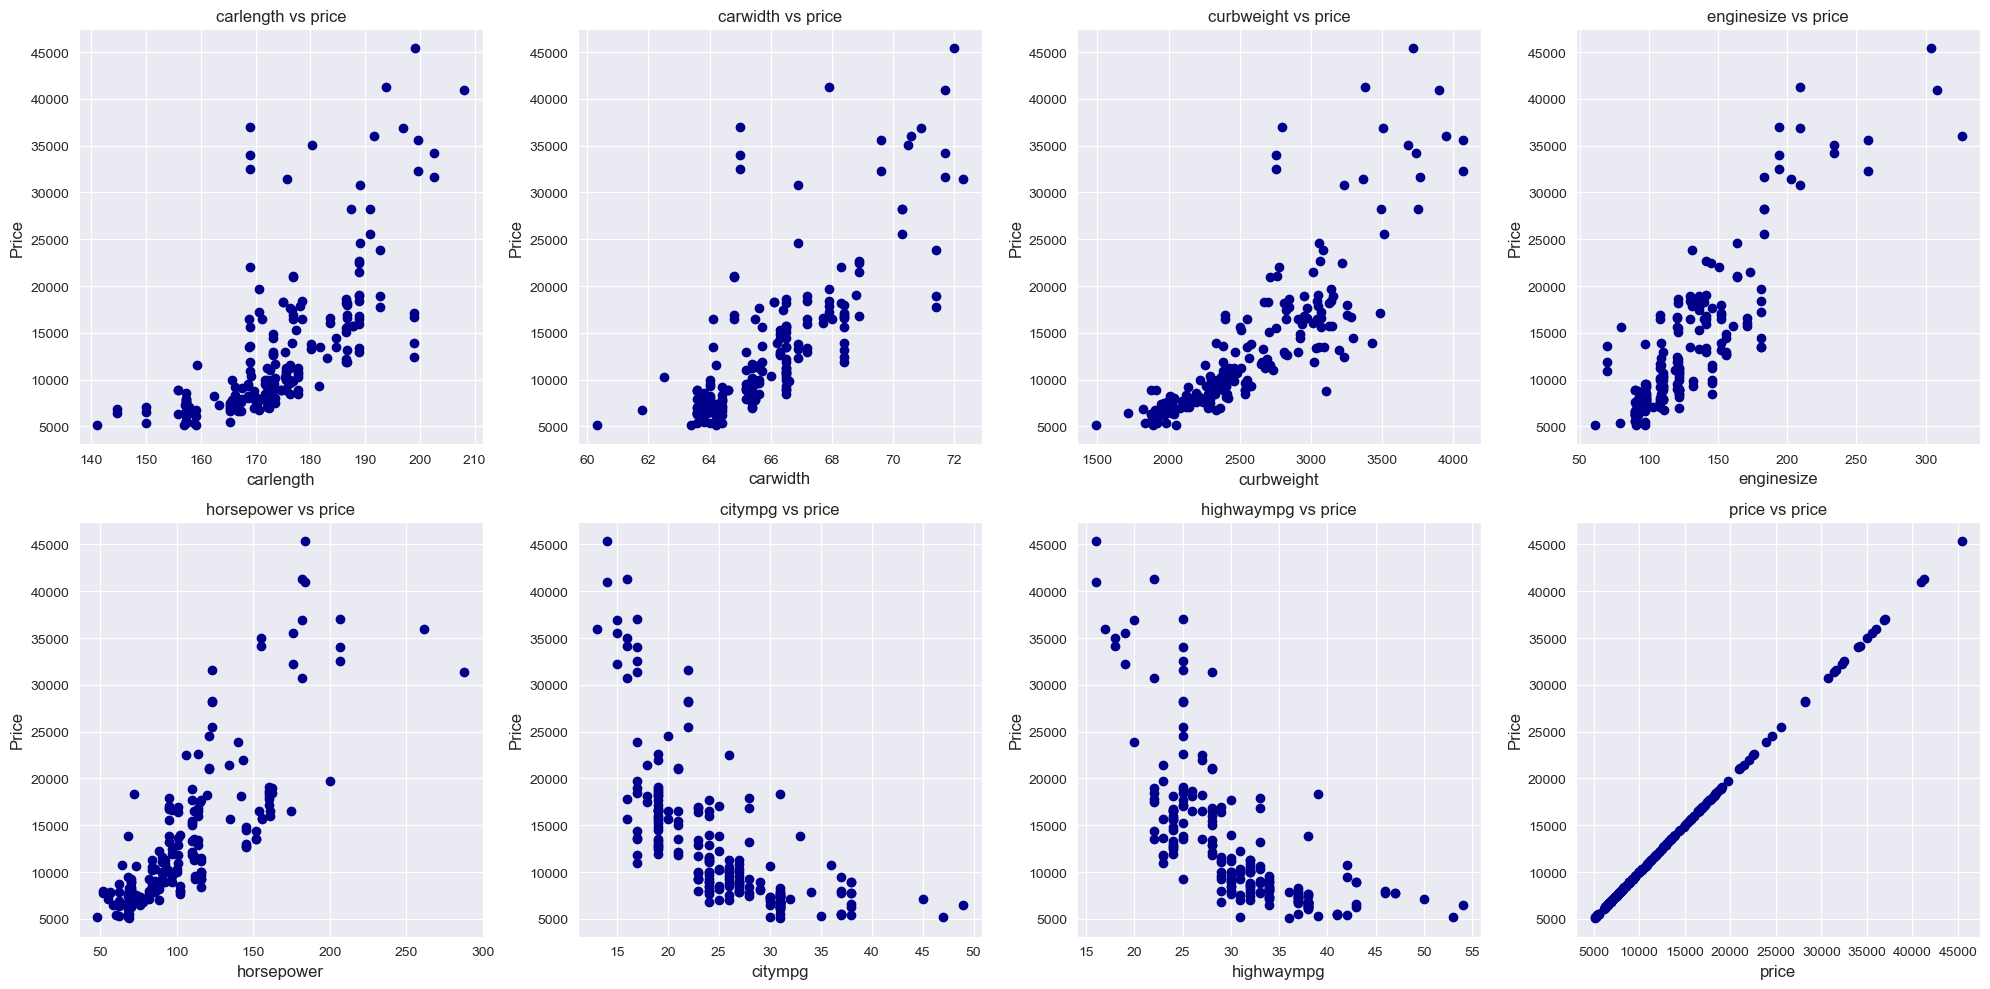

In [17]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(highest_corr_price_columns):
    axes[i].scatter(df[col], df['price'], c='darkblue')
    axes[i].set_title(f'{col} vs price')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Price", fontsize=12)

plt.tight_layout()
plt.show()

# Linear Regression

Lets start with the simplest regression with only enginesize

In [18]:
X = df.enginesize.values.reshape(-1, 1)
y = df.price.values.reshape(-1)

# X is vertical vector and y is horizontal
print(X[:10])
print(y[:10])

[[130]
 [130]
 [152]
 [109]
 [136]
 [136]
 [136]
 [136]
 [131]
 [131]]
[13495.    16500.    16500.    13950.    17450.    15250.    17710.
 18920.    23875.    17859.167]


In [19]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

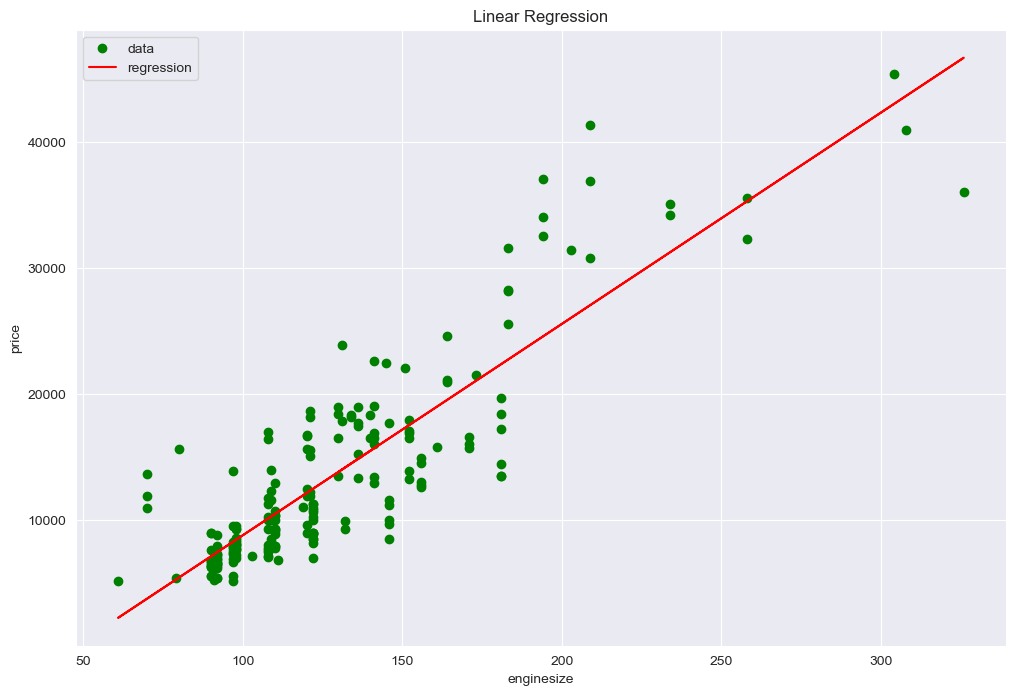

Model weights: [167.69841639]
Model intercept: -8005.445531145211
Model score: 0.76413


In [20]:
plt.figure(figsize=(12, 8))
plt.xlabel('enginesize')
plt.ylabel('price')
plt.title('Linear Regression')
plt.scatter(X, y, c='green', label='data')

plt.plot(X, model.predict(X), c='red', label='regression')

plt.legend()
plt.show()

print(f'Model weights: {model.coef_}')
print(f'Model intercept: {model.intercept_}')
print(f'Model score: {model.score(X, y).round(5)}')

In [21]:
# Function to train model and check which degree is the best
def train_model(data, features, degree, test_size=0.4):
    X = data[features].values.reshape(-1, len(features))
    
    poly = PolynomialFeatures(degree, include_bias=False)
    X = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=43)
    
    model = LinearRegression()
    
    _ = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    score = model.score(X_test, y_test)
    
    return score, mean_squared_error(y_pred, y_test), model

def best_degree(data, features, test_size=0.4, mini=1, maxi=6):
    best_score = 0
    best_score_degree = 1
    best_score_error = 0
    best_model = 1
    for i in range(mini, maxi):
        score, error, m = train_model(data, features, i, test_size)
        if score > best_score:
            best_score = score
            best_score_degree = i
            best_score_error = error
            best_model = m

    return best_score_degree, best_score, best_score_error, best_model
    

Model degree: 3
Model Score: 0.78184
Model Error: 10773913.071282746


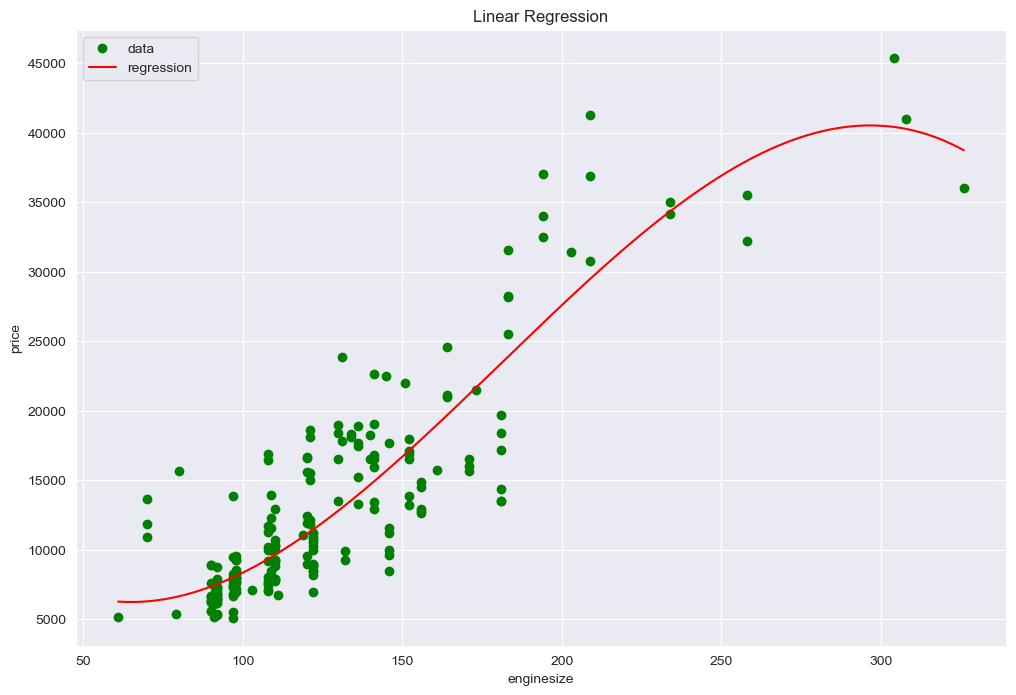

In [22]:
# Let's try with our simple model above
features = ['enginesize']
degree, score, error, m = best_degree(df, features)
print(f'Model degree: {degree}')
print(f'Model Score: {score.round(5)}')
print(f'Model Error: {error}')

x_curve = np.linspace(np.min(X), max(X), 3000)

plt.figure(figsize=(12, 8))
plt.xlabel('enginesize')
plt.ylabel('price')
plt.title('Linear Regression')
plt.scatter(X, y, c='green', label='data')

poly = PolynomialFeatures(degree, include_bias=False)
poly.fit(X)
poly_features = poly.transform(x_curve)

plt.plot(x_curve, m.predict(poly_features), c='red', label='regression')

plt.legend()
plt.show()

# Lets try models with more features

In [23]:
features = ['enginesize', 'carwidth']
degree, score, error, _ = best_degree(df, features)
print(f'Model degree: {degree}')
print(f'Model Score: {score.round(5)}')
print(f'Model Error: {error}')

Model degree: 4
Model Score: 0.81152
Model Error: 9307750.38511877


In [24]:
df1 = df.copy()
df1['drivewheel'] = df1['drivewheel'].replace(['rwd', 'fwd', '4wd'], [1, 2, 3])
features = ['enginesize', 'drivewheel']

degree, score, error, _ = best_degree(df1, features)
print(f'Model degree: {degree}')
print(f'Model Score: {score.round(5)}')
print(f'Model Error: {error}')

Model degree: 3
Model Score: 0.8651
Model Error: 6662196.131947155


In [25]:
df1 = df.copy()
df1['drivewheel'] = df1['drivewheel'].replace(['rwd', 'fwd', '4wd'], [1, 2, 3])
df1['enginelocation'] = df1['enginelocation'].replace(['front', 'rear'], [1, 2])

features = ['enginesize', 'drivewheel', 'enginelocation']
s = train_model(df1, features, 1)
print(s)
print(f'Model degree: {degree}')
print(f'Model Score: {score.round(5)}')
print(f'Model Error: {error}')
print(f'Model Error: ' + '{:.2E}'.format(error))


# THE BEST MODEL
# engine_size, drivewheel, engine_location


(0.8028005836046935, 9738572.484458182, LinearRegression())
Model degree: 3
Model Score: 0.8651
Model Error: 6662196.131947155
Model Error: 6.66E+06


In [26]:
df1 = df.copy()
df1['drivewheel'] = df1['drivewheel'].replace(['rwd', 'fwd', '4wd'], [1, 2, 3])
df1['enginelocation'] = df1['enginelocation'].replace(['front', 'rear'], [1, 2])
df1['carbody'] = df1['carbody'].replace(['sedan', 'hatchback', 'wagon', 'hardtop', 'convertible'], [1, 2, 3, 4, 5])

features = ['enginesize', 'drivewheel', 'enginelocation', 'carbody']
degree, score, error, _ = best_degree(df1, features)
print(f'Model degree: {degree}')
print(f'Model Score: {score.round(5)}')
print(f'Model Error: {error}')

Model degree: 1
Model Score: 0.80497
Model Error: 9631193.471865581


In [27]:
df1 = df.copy()
df1['drivewheel'] = df1['drivewheel'].replace(['rwd', 'fwd', '4wd'], [1, 2, 3])
df1['enginelocation'] = df1['enginelocation'].replace(['front', 'rear'], [1, 2])
df1['cylindernumber'] = df1['cylindernumber'].replace(df['cylindernumber'].values.tolist(), [i for i in range(1, len(df['cylindernumber'].values)+1)])

features = ['enginesize', 'drivewheel', 'enginelocation', 'cylindernumber']
degree, score, error, _ = best_degree(df1, features)
print(f'Model degree: {degree}')
print(f'Model Score: {score.round(5)}')
print(f'Model Error: {error}')

Model degree: 3
Model Score: 0.8624
Model Error: 6795410.815315661


# Lets implement linear regression (without bias)
Linear regression approach tries to find a vector **$b$**  which minimizes the cost function 

$$f_{y}(b) = \dfrac{|Xb - y|^2}{n}, $$

where:

$$y_{pred} = Xb $$


In [28]:
def predict(b, X):
    return X.dot(b)

def cost(y_pred, y_true):
    # return mean_squared_error(y_true, y_pred)
    return np.linalg.norm(y_pred - y_true)**2 / len(y_true)

In [29]:
# Testing above functions with simple linear regression model (just engine_size)
X = df.enginesize.values.reshape(-1, 1)
y = df.price.values.reshape(-1, 1)
print(X[:10])
print(y[:10])

# Xb = y_pred and y_pred is a vector so b has to be a Matrix with value for every feature in X (num_features_x = b_columns)

[[130]
 [130]
 [152]
 [109]
 [136]
 [136]
 [136]
 [136]
 [131]
 [131]]
[[13495.   ]
 [16500.   ]
 [16500.   ]
 [13950.   ]
 [17450.   ]
 [15250.   ]
 [17710.   ]
 [18920.   ]
 [23875.   ]
 [17859.167]]


[22019506029.510647, 21979913014.13137, 21940355660.99598, 21900833970.1045, 21861347941.456913, 21821897575.053234, 21782482870.89346, 21743103828.977592, 21703760449.305626, 21664452731.877552]
Best b: 111.0
Best b error: 21183844.58531653


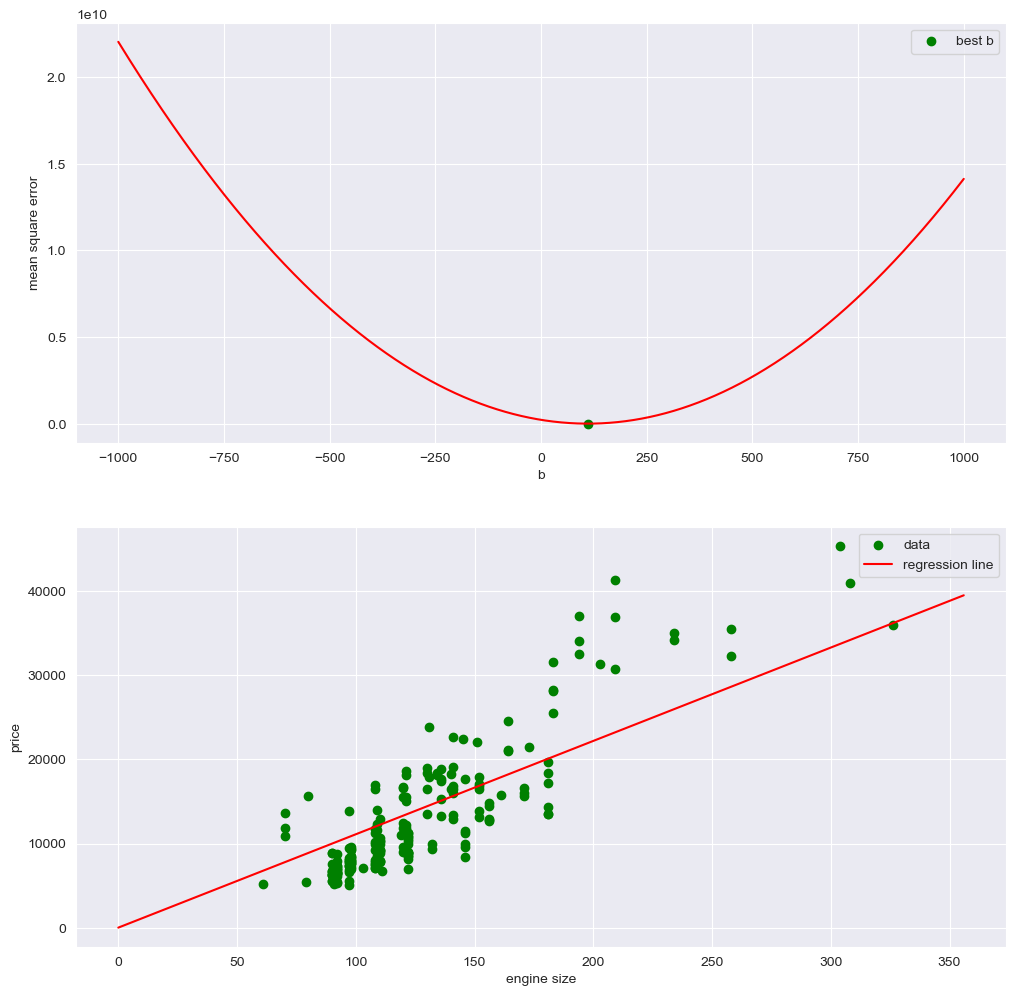

In [30]:
# Let's fine the best vector b
b = np.linspace(-1000, 1000, 2001)
errors = []

for b1 in b:
    errors.append(cost(predict(b1, X), y))
    
print(errors[:10])

best_b = b[np.argmin(errors)]
best_b_error = np.min(errors)
print(f'Best b: {best_b}')
print(f'Best b error: {best_b_error}')

plt.figure(figsize=(12, 12))
plt.subplot(211)
plt.ylabel("mean square error")
plt.xlabel("b")
plt.plot(b, errors, c='red')
plt.scatter(best_b, cost(predict(best_b, X), y), c='green', label='best b')
plt.legend()

plt.subplot(212)
plt.ylabel("price")
plt.xlabel("engine size")
plt.scatter(X, y, c='green', label='data')

x_plot = np.linspace(0, max(X) + 30, 250)
plt.plot(x_plot, predict(best_b, x_plot), c='red', label='regression line')
plt.legend()
plt.show()

# Linear regression with bias
Bias is useful in situations when we have shifted prices, for example after a new tax everything will be more expensive by the same value.
Without bias, our regression line starting from (0, 0) wouldn't be that accurate

In [31]:
# Bias is a simple vector containing 1 for every row in x
bias = [[1]] * X.shape[0]
x_with_bias = np.concatenate((X, bias), axis=1)
print(x_with_bias[:10])

[[130   1]
 [130   1]
 [152   1]
 [109   1]
 [136   1]
 [136   1]
 [136   1]
 [136   1]
 [131   1]
 [131   1]]


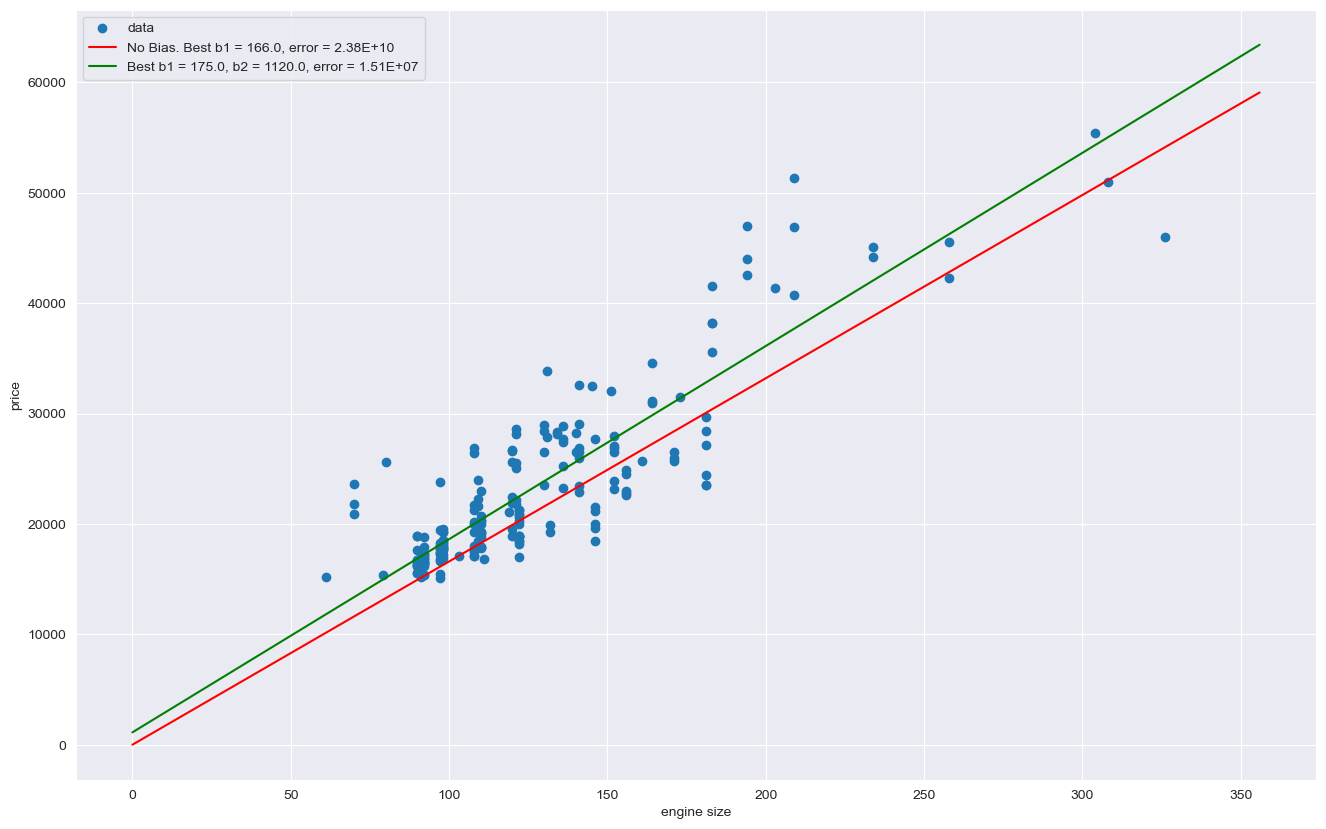

In [32]:
y_shifted = y+10000

# No Bias Part
b_arr = [np.array(b1) for b1 in np.linspace(-1000, 1000, num=2001)]
cost_arr = [cost(predict(b, x_with_bias[:,0]), y_shifted) for b in b_arr]
best_b1 = b_arr[np.argmin(cost_arr)]

# Bias part
nb_of_bs = 101 # compute the cost nb_of_bs times in each dimension
b1 = np.linspace(-500, 1000, num=nb_of_bs) # slope coefficient
b2 = np.linspace(-500, 40000, num=nb_of_bs) # bias
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) # initialize cost matrix

for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b1[i]], [b2[j]]]), x_with_bias) , y_shifted)


plt.figure(figsize=(16,10))
plt.scatter(x_with_bias.T[0], y_shifted, label='data')
plt.ylabel("price")
plt.xlabel("engine size")


plt.plot(x_plot, best_b1* x_plot, c='red', label='No Bias. Best b1 = {}, error = {:.2E}'.format(best_b1, cost_arr[np.argmin(cost_arr)]))
best_b1_2d_ind, best_b2_2d_ind = np.unravel_index(cost_arr_2d.argmin(), cost_arr_2d.shape)
best_b1 = b1[best_b1_2d_ind]
best_b2 = b2[best_b2_2d_ind]

plt.plot(x_plot, best_b1*x_plot + best_b2, c='green', label='Best b1 = {}, b2 = {}, error = {:.2E}'.format(best_b1, best_b2, cost_arr_2d[best_b1_2d_ind,best_b2_2d_ind]))

plt.legend()
plt.show()

# Standarization

Needed to improve model performance and avoid large values

$$x' = \frac{x - \bar{x}}{\sigma}. $$

In [33]:
def standardize(X):
    X = np.array(X)
    means = np.array([np.mean(X[:,i]) for i in range(X.shape[1])])
    std = np.array([np.std(X[:,i]) for i in range(X.shape[1])])
    return (X - means)/std, means, std

#b)
def destandardize(X, means, sds):
    return X*sds + means


# Gradient Descent Method

Used to find minimum of cost function.

#### GDM step by step:  
1. Choose starting point $x_{0}$ and parameters: *learning rate* and *precision*,
2. Update $x_{i+1} = x_{i} - \nabla f(x_{i})\cdot lr$, where $lr$ is learning rate parameter,
3. If $(|\nabla f(x_{i})| < precision)$, end. If not, go back to point 2.

Linear regression gradient is calculated by formula below:
$$ \nabla f_{y}(b) = \nabla\dfrac{|Xb−y|^2}{n} = \dfrac{2X^\mathsf{T}(Xb−y)}{n}.  $$

In [34]:
def gradient(b, X, y):
    return 2 * X.T.dot((X.dot(b) - y)) / len(y)

def gradient_descent_step(b, X, y, lr):
    return b - gradient(b, X, y) * lr

def find_min(b, x, y, lr, max_iter=20):
    epoch = 0
    gradients = [deepcopy(b)]
    
    while True:
        old_b = b
        b = gradient_descent_step(gradients[-1], x, y, lr)
        gradients.append(b)
        epoch+=1
        
        if epoch > max_iter or np.linalg.norm(old_b - b) < 0.005:
            break

    return gradients
    

# Gradient Descent Method in dataset

In [35]:
# Features from the best model
features = ['enginesize', 'drivewheel', 'enginelocation']
X = df[features].copy()
X['drivewheel'] = X['drivewheel'].replace(['fwd', 'rwd', '4wd'], [1, 2, 3])
X['enginelocation'] = X['enginelocation'].replace(['front', 'rear'], [1, 2])

X = X.values
y = df.price.values.reshape(-1, 1)
print(X[:10])
print(y[:10])

bias = [[1]] * X.shape[0]

standardized_x, _, _ = standardize(X)
standardized_y, yMeans, yStd = standardize(y)

x_bias = np.concatenate((standardized_x, bias), axis=1)
print(x_bias[:10])

[[130   2   1]
 [130   2   1]
 [152   2   1]
 [109   1   1]
 [136   3   1]
 [136   1   1]
 [136   1   1]
 [136   1   1]
 [131   1   1]
 [131   3   1]]
[[13495.   ]
 [16500.   ]
 [16500.   ]
 [13950.   ]
 [17450.   ]
 [15250.   ]
 [17710.   ]
 [18920.   ]
 [23875.   ]
 [17859.167]]
[[ 0.07444893  0.93399408 -0.12186667  1.        ]
 [ 0.07444893  0.93399408 -0.12186667  1.        ]
 [ 0.60404617  0.93399408 -0.12186667  1.        ]
 [-0.43107572 -0.79094994 -0.12186667  1.        ]
 [ 0.21888454  2.65893811 -0.12186667  1.        ]
 [ 0.21888454 -0.79094994 -0.12186667  1.        ]
 [ 0.21888454 -0.79094994 -0.12186667  1.        ]
 [ 0.21888454 -0.79094994 -0.12186667  1.        ]
 [ 0.09852153 -0.79094994 -0.12186667  1.        ]
 [ 0.09852153  2.65893811 -0.12186667  1.        ]]


[3.0614118563168233, 0.4672566603150385, 0.2543235655430409, 0.2104094555052187, 0.1985230353514254, 0.1945937992001824, 0.19311323374564818, 0.1925164427510424, 0.19226849880733296, 0.1921641613685801, 0.19212002124682398]
[[7.75678019e-01]
 [1.57968356e-01]
 [1.55129030e-01]
 [1.04857600e-04]]


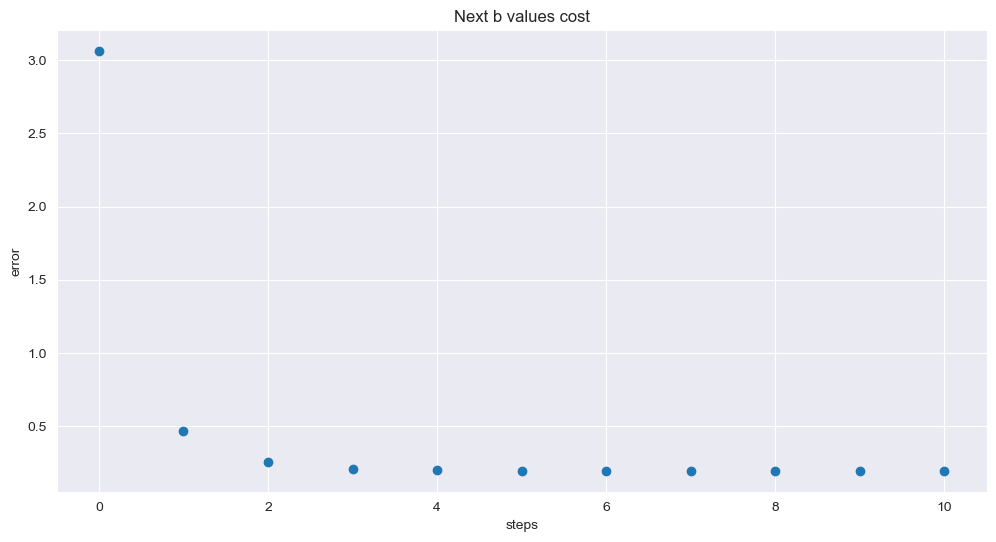

In [36]:
lr = 0.3
b = np.array([[1], [1], [1], [1]])

next_gradients = find_min(b, x_bias, standardized_y, lr)

errors = []

for b1 in next_gradients:
    errors.append(cost(predict(b1, x_bias), standardized_y))
print(errors)
best_b = next_gradients[-1]
print(best_b)

plt.figure(figsize=(12, 6))
plt.title('Next b values cost')
plt.scatter([i for i in range(len(errors))], errors)
plt.xlabel("steps")
plt.ylabel("error")
plt.show()
        

In [37]:
y_pred = predict(best_b, x_bias)
y_pred_destandardized = destandardize(y_pred, yMeans, yStd)
model_error = cost(y_pred_destandardized, y)

print('Model Error: ' + '{:.2E}'.format(model_error))

# Lets calculated model.score() from scikit-learn
u = ((y - y_pred_destandardized) ** 2).sum()
v = ((y - y.mean()) ** 2).sum()
print(f'Model Score: {(1 - u/v).round(4)}')

temp = np.concatenate((y, y_pred_destandardized), axis=1)
print('\nFirst 10 prices vs their prediction')
print(temp[:10])

Model Error: 1.22E+07
Model Score: 0.8079

First 10 prices vs their prediction
[[13495.         14762.91107784]
 [16500.         14762.91107784]
 [16500.         18036.69300627]
 [13950.          9466.39833001]
 [17450.         17827.29978354]
 [15250.         13484.22160582]
 [17710.         13484.22160582]
 [18920.         13484.22160582]
 [23875.         12740.18025845]
 [17859.167      17083.25843617]]


In [38]:
features = ['enginesize', 'drivewheel', 'enginelocation']
df1 = df.copy()
df1['drivewheel'] = df1['drivewheel'].replace(['fwd', 'rwd', '4wd'], [1, 2, 3])
df1['enginelocation'] = df1['enginelocation'].replace(['front', 'rear'], [1, 2])
score, error, m = train_model(df1, features, 1)

print(f'Model Score: {score}')

Model Score: 0.8044265405651299


## Model Score using scikit-learn Linear Regression class is the same like from Gradient Descent Method with standardization